In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from spectral import *
import spectral.io.envi as envi
import wx
from typing import Callable
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, fixed
from functools import partial
import os

os.environ['PYSPY_USE_WX'] = 'True'

np.set_printoptions(linewidth=800)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 900)
pd.set_option('display.width', 1000)


In [2]:
def load_data(main_folder: str, fruit: str) -> pd.DataFrame:
    absolute = main_folder

    all_folders = os.listdir(absolute)

    data = dict(day=[], fruit=[], hdr=[], bin=[])
    for folder in all_folders:
        data_paths = os.listdir(absolute / folder)
        day_label = folder.replace("_m3", "")

        for path in data_paths:
            extension = path.split(".")[1]
            if extension == "bin":
                continue
            
            prefix = absolute / folder
            data["day"].append(day_label)
            data["fruit"].append(fruit)
            data["hdr"].append(prefix / path)
            data["bin"].append(prefix / data_paths[data_paths.index(path.replace(".hdr", ".bin"))])

    return pd.DataFrame.from_dict(data)


def get_image_min_max(img: np.array):
    print(f"Max band value {np.max(img)}, Min band value {np.min(img)}")
    return img


def read_image(idx: int, image_transforms: list[Callable] | None = None):
    print(idx)
    hdr, bin_ = df.iloc[idx].hdr, df.iloc[idx].bin
    img = envi.open(hdr, image=bin_).load()

    if image_transforms is not None and len(image_transforms) != 0:
        for transform in image_transforms:
            img = transform(img)
    
    return img
    

In [3]:
oobx_dir = Path('../fruits_dataset')

fruit = 'Avocado'

path = oobx_dir / fruit / 'VIS'

anno_path = oobx_dir / 'annotations'
val_json = anno_path / 'val_v2.json'

In [26]:
avocado = load_data(path, "avocado")
avocado.head(10)

,day,fruit,hdr,bin
0,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
1,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
2,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
3,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
4,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
5,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
6,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
7,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
8,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...
9,day_m2_05,avocado,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...,../fruits_dataset/Avocado/VIS/day_m2_05/avocad...


In [5]:
paths = load_data(path, 'avocado')
df = pd.DataFrame.from_dict(paths)
df.head()

,day,fruit,hdr,bin
0,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
1,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
2,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
3,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...
4,day_m2_10,avocado,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...,../fruits_dataset/Avocado/VIS/day_m2_10/avocad...


In [6]:
day_01 = read_image(46, [get_image_min_max])

46
Max band value 1.2100456953048706, Min band value -0.3598485589027405


/home/oobx/Desktop/PROJEKTY/SIiUM/env/lib/python3.12/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [22, 59, 20]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.0027846579905599356, 0.12769374251365662]
    G: [0.0, 0.2528291344642639]
    B: [-0.005022241268306971, 0.125804141163826]

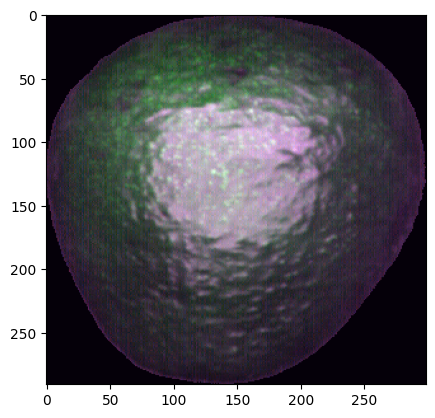

In [7]:
imshow(day_01[:, :], bands=[22, 59, 20])

ImageView object:
  Display bands       :  (0, 112, 223)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.21755710244178772, 0.4881356358528137]
    G: [0.0532248392701149, 0.16837579011917114]
    B: [0.5205479264259338, 0.7948403358459473]

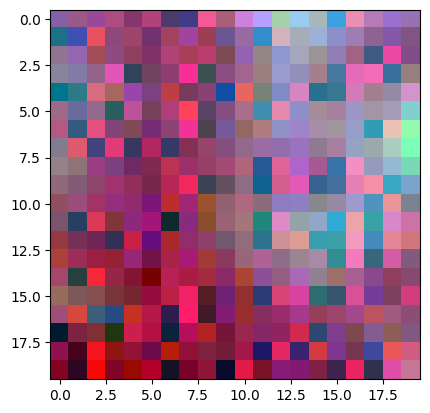

In [8]:
imshow(day_01[200:220, 100:120], bands=(0, 112, 223))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.18709535896778107]
    G: [0.0, 0.18709535896778107]
    B: [0.0, 0.18709535896778107]

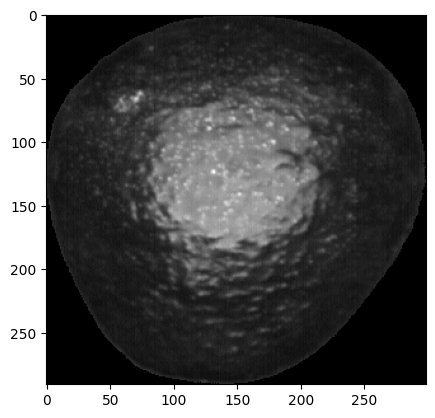

In [9]:
single_band = day_01[:, :, 100]
imshow(single_band)

In [10]:

def display_band(img, index):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6))
    ax1.imshow(img[:, :, index])
    ax1.set_title(f'Band {index}')
    
    ax2.hist(img[:, :, index].ravel(), bins=256)
    ax2.set_title('Pixel Intensity Histogram')

    h, w = round(img.shape[0] / 2), round(img.shape[1] / 2)
    ax3.plot(img[h, w])
    ax3.set_title('Middle pixel')
    
    plt.show()
    plt.close()


def display_(image):
    interact(display_band, img=fixed(image), index=(0, image.shape[2] - 1))


def find_closest_wavelenght(wavelength):
    water_marks = np.array([970, 1190, 1450, 1940])
    tol = 1  # nm
    
    if pd.isna(wavelength):
        return None
        
    rng = water_marks[np.logical_and(wavelength >= water_marks - tol, wavelength <= water_marks + tol)]
    
    if len(rng) > 0:
        return np.where(water_marks == rng[0])[0].astype('uint8')[0]

In [11]:
data = json.loads(val_json.read_text())
df = pd.json_normalize(data)

In [12]:
for item in df:
    print(item)

cameras
days
records
annotations
info.createdAt


In [13]:

df_combined = pd.DataFrame({
    'Specim bands': dict(enumerate(df.cameras[0][0]['wavelengths'])),
    'Redeye bands': dict(enumerate(df.cameras[0][1]['wavelengths'])),
    'Corning bands':dict(enumerate(df.cameras[0][2]['wavelengths'])),
})

df_combined.head(20)

,Specim bands,Redeye bands,Corning bands
0,397.66,919.6780,408.034
1,400.28,922.9758,410.023
2,402.90,926.2727,412.012
3,405.52,929.5688,414.001
4,408.13,932.8640,415.989
5,410.75,936.1584,417.978
6,413.37,939.4520,419.967
7,416.00,942.7448,421.956
8,418.62,946.0367,423.945
9,421.24,949.3277,425.933


In [14]:

df_combined['Water mark Specim'] = df_combined['Specim bands'].apply(find_closest_wavelenght)
df_combined['Water mark Redeye'] = df_combined['Redeye bands'].apply(find_closest_wavelenght)
df_combined['Water mark Corning'] = df_combined['Corning bands'].apply(find_closest_wavelenght)


In [15]:

watermark_specim = df_combined['Water mark Specim'].dropna().index.to_list()
watermark_redeye = df_combined['Water mark Redeye'].dropna().index.to_list()
watermark_corning = df_combined['Water mark Corning'].dropna().index.to_list()


In [16]:
print(f"""
Specim water idx: {watermark_specim}\n
Redeye water idx: {watermark_redeye}\n
Corning water idx: {watermark_corning}
""")


Specim water idx: [211]

Redeye water idx: [15, 83, 164]

Corning water idx: []



In [23]:
day_01 = envi.open('../fruits_dataset/Avocado/NIR/day_01/avocado_day_01_20_front.hdr',
                 '../fruits_dataset/Avocado/NIR/day_01/avocado_day_01_20_front.bin').load()


/home/oobx/Desktop/PROJEKTY/SIiUM/env/lib/python3.12/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 126, 251]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.9373403787612915]
    G: [0.0, 0.6311379075050354]
    B: [-0.6719995141029358, 0.7830685377120972]

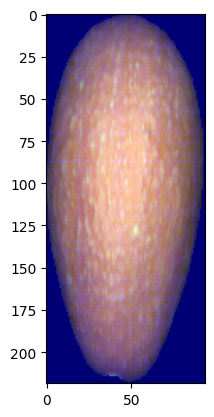

In [24]:
imshow(day_01)

In [25]:
display_(day_01)

interactive(children=(IntSlider(value=125, description='index', max=251), Output()), _dom_classes=('widget-int…

In [20]:
img3 = envi.open('../fruits_dataset/Avocado/NIR/day_10/avocado_day_10_01_front.hdr',
                 '../fruits_dataset/Avocado/NIR/day_10/avocado_day_10_01_front.bin').load()

In [21]:
display_(img3)

interactive(children=(IntSlider(value=125, description='index', max=251), Output()), _dom_classes=('widget-int…